<a href="https://colab.research.google.com/github/al-dayviid21/car_purchase_ml/blob/main/Car_purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Statements

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Read statements

In [5]:
df = pd.read_csv("car_data.csv")
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


# Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [13]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


#### Visualize the Gender Proportion

In [7]:
gender_plt = df.Gender.value_counts(normalize=True)

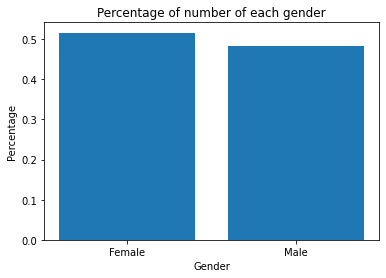

In [8]:
# Make a bar plot
plt.bar(x=gender_plt.index, height=gender_plt.values)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of number of each gender')
plt.show()

#### Visualize the distribution of the annual salary

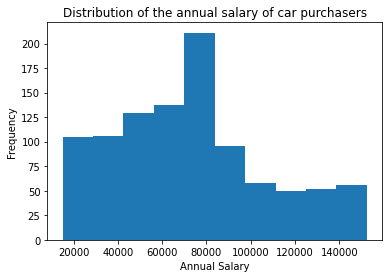

In [12]:
plt.hist(df.AnnualSalary)
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.title('Distribution of the annual salary of car purchasers')
plt.show()

The annual salary is normally distributed with the mode at 80,000.

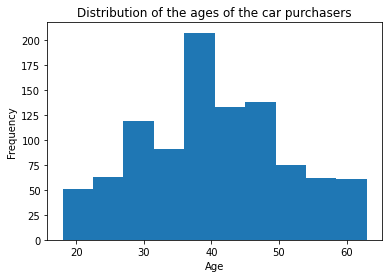

In [ ]:
plt.hist(df.Age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of the ages of the car purchasers')
plt.show()

The ages of the respondents/potential customers is normally distributed.

# Wrangle Data

In [14]:
# Rename User id
df.rename(columns={'User ID':'User_id'}, inplace=True)

# Encode categorical data

In [15]:
df1 = pd.get_dummies(df)
df1.head()

,User_id,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
0,385,35,20000,0,0,1
1,681,40,43500,0,0,1
2,353,49,74000,0,0,1
3,895,40,107500,1,0,1
4,661,25,79000,0,0,1


# Get labels and features

In [42]:
X = df1.drop(['Purchased', 'User_id'], axis=1)
y = df1['Purchased']

# Test Train Validation Split

In [43]:
# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

# Split train data into train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1)

# Train and Evaluate Data

## Random Forest

In [44]:
# Fit and train classifier
clf_rfc = RandomForestClassifier(random_state=42)
clf_rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [45]:
# Print out classification report by making predictions using the training dataset
y_pred = clf_rfc.predict(X_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       477
           1       0.99      1.00      1.00       333

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



In [46]:
# Print out classification report by making predictions using the validation dataset
y_pred_val = clf_rfc.predict(X_val)
print(classification_report(y_pred_val, y_val))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        62
           1       0.86      0.86      0.86        28

    accuracy                           0.91        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.91      0.91      0.91        90



## Decision Tree Classifier

In [47]:
# Fit and train classifier
clf_dtc = DecisionTreeClassifier(random_state=42)
clf_dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [48]:
# Print out classification report by making predictions using the training dataset
y_pred = clf_dtc.predict(X_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       479
           1       0.99      1.00      1.00       331

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



In [49]:
# Print out classification report by making predictions using the validation dataset
y_pred_val = clf_dtc.predict(X_val)
print(classification_report(y_pred_val, y_val))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.82      0.85      0.84        27

    accuracy                           0.90        90
   macro avg       0.88      0.89      0.88        90
weighted avg       0.90      0.90      0.90        90



## Logistic Regression

In [50]:
# Fit and train classifier
clf_lg = LogisticRegression(random_state=42)
clf_lg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [51]:
# Print out classification report by making predictions using the training dataset
y_pred = clf_lg.predict(X_train)
print(accuracy_score(y_pred, y_train))

0.5876543209876544


In [52]:
# Print out classification report by making predictions using the validation dataset
y_pred_val = clf_lg.predict(X_val)
print(accuracy_score(y_pred_val, y_val))

0.6888888888888889


# Train and validate Preprocessed Data 

The data used earlier to fit and validate the models above were not preprocessed using tools like Standard Scaler. This may imply that some features may have more weight in the final prediction of data using the model than others. Hence, we want to see the effect of preprocessing on the model accuracy.

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Random Forest

In [54]:
# Fit and train classifier
clf_rfc = RandomForestClassifier(random_state=42)
clf_rfc.fit(X_train, y_train)

# Print out classification report by making predictions using the validation dataset
y_pred_val = clf_rfc.predict(X_val)
print(classification_report(y_pred_val, y_val))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93        61
           1       0.86      0.83      0.84        29

    accuracy                           0.90        90
   macro avg       0.89      0.88      0.88        90
weighted avg       0.90      0.90      0.90        90



# Decision Tree Classifier

In [55]:
# Fit and train classifier
clf_dtf = DecisionTreeClassifier(random_state=42)
clf_dtf.fit(X_train, y_train)

# Print out classification report by making predictions using the validation dataset
y_pred_val = clf_dtf.predict(X_val)
print(classification_report(y_pred_val, y_val))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.82      0.85      0.84        27

    accuracy                           0.90        90
   macro avg       0.88      0.89      0.88        90
weighted avg       0.90      0.90      0.90        90



# Logistic Regression

In [56]:
# Print out classification report by making predictions using the validation dataset
clf_lg = LogisticRegression(random_state=42)
clf_lg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [57]:
# Print out classification report by making predictions using the validation dataset
y_pred_val = clf_lg.predict(X_val)
print(accuracy_score(y_pred_val, y_val))

0.8888888888888888


# Discussion

The introduction of the standard scaler only had an effect in the LogisticRegression model increasing the validation accuracy from 0.69 to 0.89. For the other remaining models, no significant change in the test accuracy was recorded. A comparison between the three classfiers shows no significant difference between them.

# Final Test

For this test, the randomforestclassifier was chosen 

In [35]:
# Print out classification report by making predictions using the validation dataset
y_pred_val = clf_rfc.predict(X_test)
print(classification_report(y_pred_val, y_test))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        62
           1       0.80      0.84      0.82        38

    accuracy                           0.86       100
   macro avg       0.85      0.86      0.85       100
weighted avg       0.86      0.86      0.86       100



The accuracy of this model is 86%.